# Методы анализа и обработки изображения
---

ЛР1 - Коррекция яркости и цвета

Студентка гр. РИМ-181226

Бабайлова Маргарита Леонидовна

In [1]:
import numpy as np 
from skimage.io import imread, imshow, imsave
from numpy import clip, histogram, average
from skimage import img_as_uint, img_as_ubyte, img_as_float
import matplotlib.pyplot as plt

In [2]:
MODIFY_IMAGE_PATH = 'temporary-image.png'

import os

def show_img(img):
    imsave(MODIFY_IMAGE_PATH, img)
    print(imshow(MODIFY_IMAGE_PATH))
    os.remove(MODIFY_IMAGE_PATH)
    
def save_img(img, filename):
    imsave(filename, img)

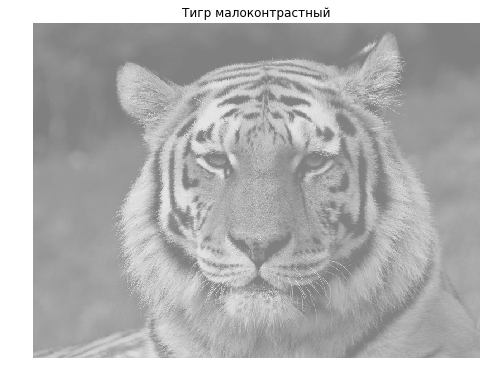

In [3]:
img = imread('https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png')
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(img)
plt.title('Тигр малоконтрастный')
plt.show()

Автоконтраст

In [4]:
def linear_stretching(channels, Xmin, Xmax, isFloat = False):
    stretched = ((channels - Xmin) * (1 if isFloat else 255 / (Xmax - Xmin))).astype('uint8')
    return clip(stretched, 0, 1 if isFloat else 255)

In [5]:
def autocontrast(original_img):
    img = original_img.copy()
    
    Xmin = min(img.ravel())
    Xmax = max(img.ravel())

    return linear_stretching(img, Xmin, Xmax)

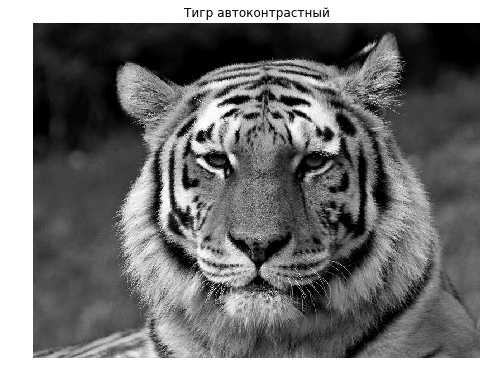

In [6]:
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(autocontrast(img))
plt.title('Тигр автоконтрастный')
plt.show()

Доработка функции автоконтраста

Устойчивый автоконтраст

In [7]:
def Xmin_Xmax (img): 
    img=img.astype(float) 
    k=round(len(img.ravel())*0.05) 
    pixels=sorted(img.ravel())[k:-k] 
    Xmin, Xmax=min(pixels), max(pixels) 
    return Xmin, Xmax

def new_autocontrast(img, Xmin, Xmax, max_c=255): 
    k=255/(Xmax-Xmin) 
    img_contrast=clip(((img-Xmin)*k), 0, max_c).astype('uint8') 
    return img_contrast 

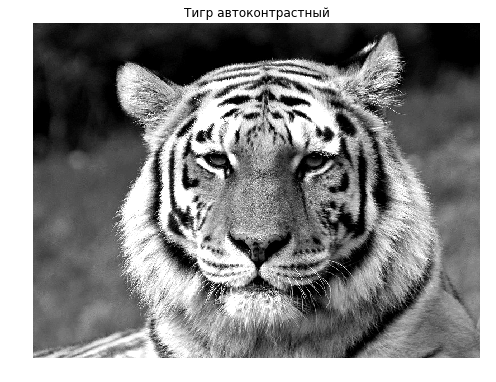

In [8]:
Xmin, Xmax=Xmin_Xmax(img)
img_contrast=new_autocontrast(img, Xmin, Xmax) 
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(img_contrast)
plt.title('Тигр автоконтрастный')
plt.show()

Коррекция контраста цветного изображения

Устойчивый автоконтраст цветного изображения

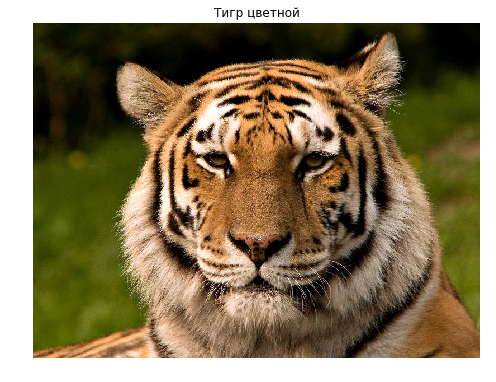

In [9]:
imgTiger = imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(imgTiger)
plt.title('Тигр цветной')
plt.show()

In [10]:
from numpy import dstack

def stack_img(red, green, blue):
    return dstack((red, green, blue))

In [11]:
def rgb_to_channels(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    return R, G, B

In [12]:
def rgb_to_yuv(R, G, B):
    Y = 0.2126 * R + 0.7152 * G + 0.0722 * B
    U = -0.0999 * R - 0.3360 * G + 0.4360 * B
    V = 0.6150 * R - 0.5586 * G - 0.0563 * B
    
    return Y, U, V

def yuv_to_rgb(Y, U, V):
    
    R = Y + 1.2803 * V
    G = Y - 0.2148 * U - 0.3805 * V
    B = Y + 2.1279 * U
    
    return R, G, B

In [13]:
def linear_stretching_yuv(Y, Xmax, Xmin):
    Y_modify = (Y - Xmin) * 255 / (Xmax - Xmin)
    return clip(Y_modify, 0, 255)

In [14]:
def color_autocontrast(image_original):
    img = image_original.copy()
    img = img.astype('float')
    
    R, G, B = rgb_to_channels(img)
    
    Y, U, V = rgb_to_yuv(R, G, B)
    
    k = round(img.shape[0]*img.shape[1]*0.05)
    
    Y_sort = Y.copy().ravel()
    Y_sort.sort()
    
    Xmin = Y_sort[k]
    Xmax = Y_sort[len(Y_sort) - k]
    
    Y_modify = linear_stretching_yuv(Y, Xmax, Xmin)
    
    R_contrast, G_contrast, B_contrast = yuv_to_rgb(Y_modify, U, V)
    
    img_contrast = stack_img(R_contrast, G_contrast, B_contrast)
    
    img_contrast = clip(img_contrast,0,255)
    
    return img_contrast.astype('uint8')

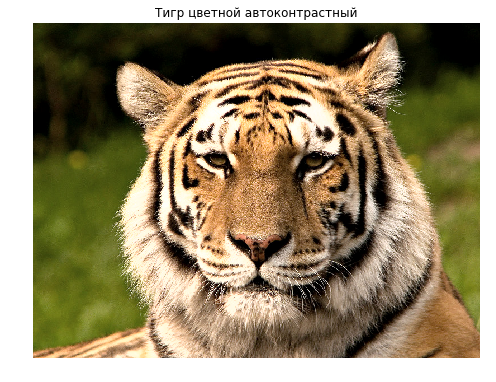

In [15]:
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(color_autocontrast(imgTiger))
plt.title('Тигр цветной автоконтрастный')
plt.show()

Баланс белого. Модель «серого мира»

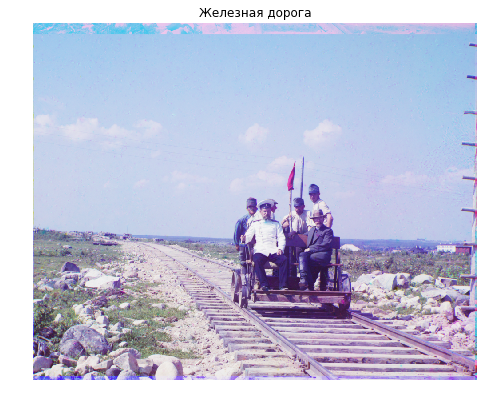

In [16]:
imgRailroad = imread('https://stepik.org/media/attachments/lesson/60610/railroad.png')
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(imgRailroad)
plt.title('Железная дорога')
plt.show()

In [17]:
def white_balance(image_original):
    img = image_original.copy()
    img = img.astype('float')
    
    R, G, B = rgb_to_channels(img)
    
    R_ravel = R.ravel()
    G_ravel = G.ravel()
    B_ravel = B.ravel()
    
    avg=(average(R_ravel)+average(G_ravel)+average(B_ravel))/3
    
    Rw = average(R_ravel)/avg
    Gw = average(G_ravel)/avg
    Bw = average(B_ravel)/avg
    
    R = R/Rw
    G = G/Gw
    B = B/Bw
    
    img_balanced = stack_img(R, G, B)
    img_balanced = clip(img_balanced, 0, 255)
    
    return img_balanced.astype('uint8')

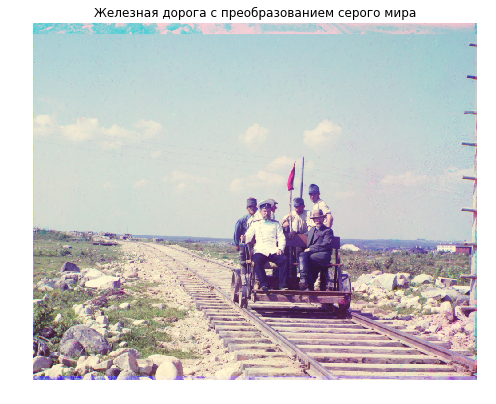

In [18]:
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(white_balance(imgRailroad))
plt.title('Железная дорога с преобразованием серого мира')
plt.show()

Выравнивание гистограммы

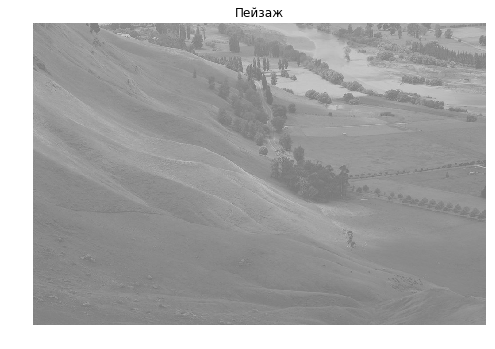

In [19]:
imgLandscape = imread('https://stepik.org/media/attachments/lesson/60611/landscape.png')
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(imgLandscape)
plt.title('Пейзаж')
plt.show()

In [20]:
def make_histogram(img):
    hist = np.zeros(256,np.int32)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            value = img[i][j]
            hist[value] += 1
    return hist

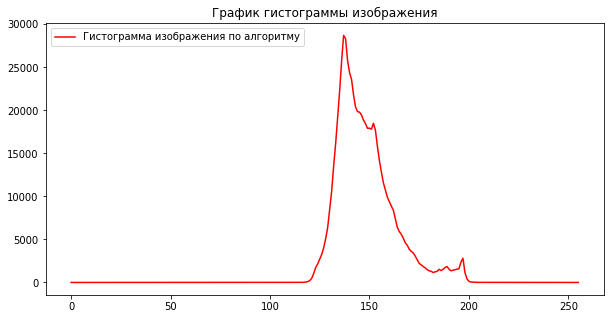

In [21]:
landscape_hist = make_histogram(imgLandscape)
plt.figure(figsize = (10, 5))
plt.plot(landscape_hist, 'r')
plt.legend(['Гистограмма изображения по алгоритму'])
plt.title('График гистограммы изображения')
plt.show()


In [22]:
def make_cdf(hist):
    cdf = np.zeros(256,np.int32)
    for i in range(256):
        cdf[i] = sum(hist[0:i])
        
    return cdf

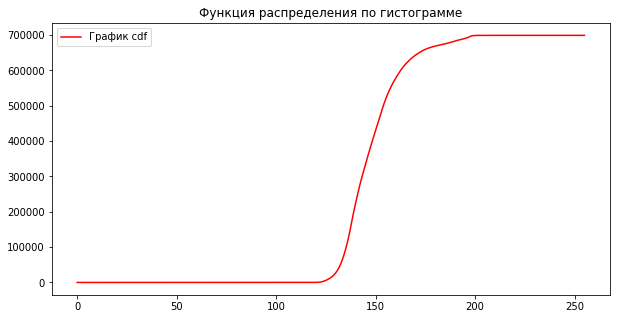

In [23]:
landscape_hist_cdf = make_cdf(landscape_hist)
plt.figure(figsize = (10, 5))
plt.plot(landscape_hist_cdf, 'r')
plt.legend(['График cdf'])
plt.title('Функция распределения по гистограмме')
plt.show()

In [24]:
def correct_cdf(cdf, img):
    height = img.shape[0]
    width = img.shape[1]
    hist = np.zeros((height,width))
    cdf_min = min(cdf > 0)

    for i in range(height):
        for j in range(width):
            x = img[i][j]
            hist[i][j] = round((cdf[x] - cdf_min)/(height * width - 1) * 255)
            
    return hist

def hist_correction(img):
    cdf = make_cdf(make_histogram(img))
    
    img_corrected = correct_cdf(cdf, img)
    img_corrected = clip(img_corrected, 0, 255)
    
    return img_corrected.astype('uint8')

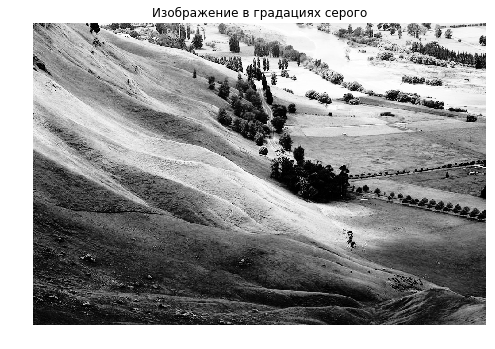

In [25]:
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(hist_correction(imgLandscape))
plt.title('Изображение в градациях серого')
plt.show()